<font size=6><b>lec15. 시계열 ARIMA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

### 1) 정의 * 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 * 과거의 패턴이 미래에도 지속된다는 데이터의 안정성(정상성 stationary)이 기본적인 가정으로 필요g>

### 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동


### 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font>
<img src=https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcPUgQm%2Fbtq5Fhh5em0%2FhaKQOzuv0kEE3eYfLNOpLK%2Fimg.jpg>


### 4) 정상성
* 시간에 따른 평균&분산이 일정한 패턴

### <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src=https://velog.velcdn.com/images/leeebs/post/2328c13c-a990-4874-ba6a-14b24b2b8f6f/image.png>

# 시계열 모델

### AR(Autoregression) 자기상관 모델* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다
*  회기식 + 백색잡음* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>
>

### MA(Moving Average) 이동평균 모델
* <font color=red>이전 관측값의 예측 오차(e(t-1))를 이용하여 미래 값을 예측하는 모델</font>
* 데이터의 평균값이 시간에 따라 변화하는 추이 
* $Y_t = (e_{t-1} * w) + …  +c + (e_t)$
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>


### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
* <img src='https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27'>

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

## 최적의 p, q 찾기

<h3>ACF(Autocorrelation function) :자기상관함수 </h3><pre>* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용

# 실습 : 날씨 예측

* date : rdate -날짜 형식 변환
* meantemp- 연속형


In [2]:
df= pd.read_csv('lec15_Summary of Weather.csv', parse_dates=['Date'])[['STA','Date','MeanTemp']]
df.columns = ['sta','rdate','temp']
df= df.set_index('rdate')
df=df[df['sta']==10001]
df.drop('sta',axis=1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 1942-07-01 to 1945-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1157 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


In [4]:
df.head(3)

,temp
rdate,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444


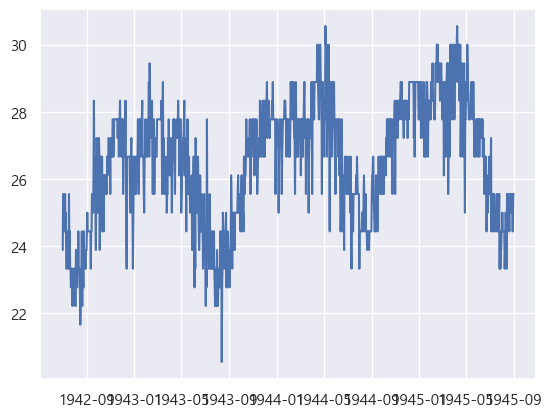

In [5]:
plt.plot(df)

In [6]:
df.describe()

,temp
count,1157.000000
mean,26.514933
std,1.777196
min,20.555556
25%,25.000000
50%,26.666667
75%,27.777778
max,30.555556


## 시계열 분해
* ref https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
* ```python
  statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
res= seasonal_decompose(df, model='additive', period=365)

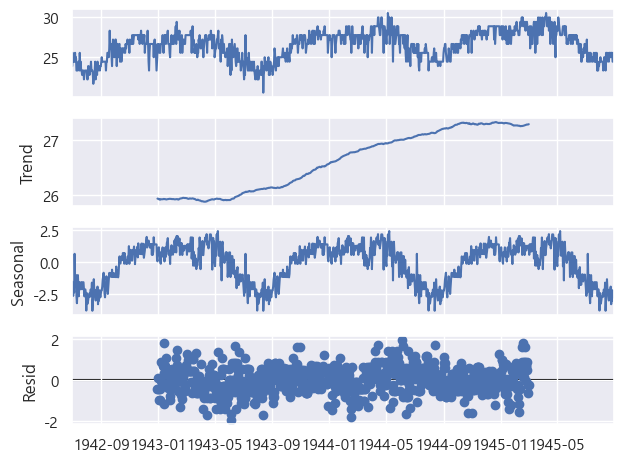

In [9]:
res.plot()
plt.show()

# 정상성 검정 
* ref : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
```python
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False

## ADF 정상성 검정
* <b>Augmented Dickey-Fuller test</b>
    * 검정 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
    * <font color=red><b>귀무가설(H0): non-stationary.
    * <font color=red><b>대체가설 (H1): stationary.

<pre>
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

return
adf
The test statistic.

<b>pvalue
MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).</b>

usedlag
The number of lags used.

nobs
The number of observations used for the ADF regression and calculation of the critical values.

critical values
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).

icbest
The maximized information criterion if autolag is not None.

resstore
A dummy class with results attached as attributes.

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
res= adfuller(df, autolag='AIC')
res[1] #p-value 
# 0.05보다 크다 : 귀무가설 채택(정상성을 띠지 않는다)

0.13838534571230615

# 데이터 정상성 
* 분산 : 로그 변환
* 평균 : 차분<font color= red>( df.shift () : 1일 차분/ 결측처리해야한다 ) 

In [12]:
temp =df[:5]

print( temp)
print(temp.shift(2))
print(temp.shift(-2))
# 30일 이평 계산 하기 위해서는 30일 이전 데이터를 가지고 와야함.


                 temp
rdate                
1942-07-01  23.888889
1942-07-02  25.555556
1942-07-03  24.444444
1942-07-04  24.444444
1942-07-05  24.444444
                 temp
rdate                
1942-07-01        NaN
1942-07-02        NaN
1942-07-03  23.888889
1942-07-04  25.555556
1942-07-05  24.444444
                 temp
rdate                
1942-07-01  24.444444
1942-07-02  24.444444
1942-07-03  24.444444
1942-07-04        NaN
1942-07-05        NaN


In [13]:
#전일값으로 값 채우기
temp = temp.shift()
temp.fillna(method='bfill',inplace= True)
temp

,temp
rdate,
1942-07-01,23.888889
1942-07-02,23.888889
1942-07-03,25.555556
1942-07-04,24.444444
1942-07-05,24.444444


In [14]:
#익일값으로 값 채우기
temp = temp.shift(-1)
temp.fillna(method='ffill',inplace= True)
temp

,temp
rdate,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [15]:
df_diff =df- df.shift()
df_diff.fillna(method='bfill',inplace=True)
df_diff

,temp
rdate,
1942-07-01,1.666667
1942-07-02,1.666667
1942-07-03,-1.111111
1942-07-04,0.000000
1942-07-05,0.000000
...,...
1945-08-27,0.000000
1945-08-28,-1.111111
1945-08-29,0.000000


In [16]:
res= adfuller(df_diff, autolag='AIC')
res[1] #p-value 
# 0.05보다 크다 : 귀무가설  기각(정상성을 띈다.)

1.8665176877013942e-26

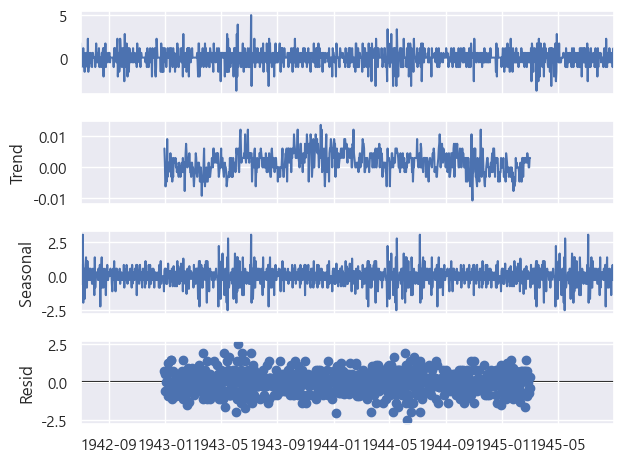

In [17]:
res= seasonal_decompose(df_diff, model='additive', period=365)
res.plot()
plt.show()

# 모델 선택
* AR? vs. MA?
* ACF.PACF 사용 : 적정 p q d 찾기
* ACF : https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF : https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

```python
statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)

statsmodels.graphics.tsaplots.plot_pacf(x, ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)

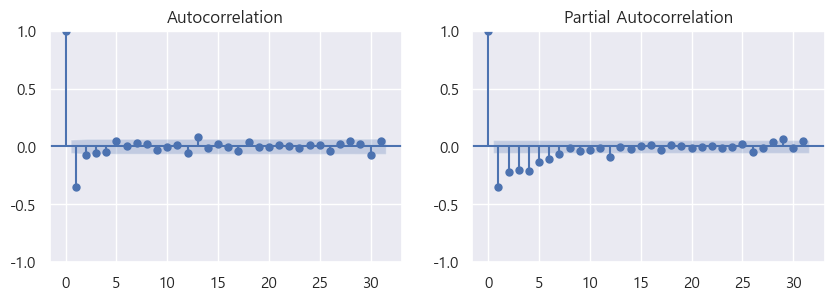

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
plot_acf(df_diff,   ax=ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(df_diff,   ax=ax2)

plt.show()

* AR : PACF 
* MA : ACF
* x차분 했을때 그래프가 급격히 정상성 범위로 들어오는지 확인
  * MA(1)
  * ARIMA( 0 1 1 )

# ARIMA.
* ref: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

```python
class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.01, shuffle=False)
print(X_train.shape, X_test.shape)
X_train.index = pd.DatetimeIndex(X_train.index).to_period('D')
model=ARIMA(X_train, order=(0, 1, 1))
fit_res=model.fit()
fit_res.summary()

(1145, 1) (12, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1145
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1461.044
Date:                Mon, 18 Sep 2023   AIC                           2926.089
Time:                        16:32:04   BIC                           2936.173
Sample:                    07-01-1942   HQIC                          2929.896
                         - 08-19-1945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7302      0.019    -38.374      0.000      -0.768      -0.693
sigma2         0.7526      0.023     32.653      0.000       0.707       0.798
===================================================================================
Ljung-Box (L1) (Q):                  23.47   Jarque-Bera (JB):               215.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 예측 
* ref : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html#statsmodels.tsa.arima.model.ARIMAResults.forecast
* 
```python 
ARIMAResults.predict(start=None, end=None, dynamic=False, information_set='predicted', signal_only=False,typ='linear's
```
typ (str {'linear', 'levels'}) –* ‘linear’ : Linear prediction in terms of the differenced endogenous variables.* ’levels’ : Predict the levels of the original endogenous variables¶


ARIMAResults.forecast(steps=1, signal_only=False, **kwargs¶



In [31]:
# fit_res.forecast(step=12)
pred =fit_res.predict(1146,1146+11,typ='levels') # 1145까지 Train.
pred

1945-08-20    25.000232
1945-08-21    25.000232
1945-08-22    25.000232
1945-08-23    25.000232
1945-08-24    25.000232
1945-08-25    25.000232
1945-08-26    25.000232
1945-08-27    25.000232
1945-08-28    25.000232
1945-08-29    25.000232
1945-08-30    25.000232
1945-08-31    25.000232
Freq: D, Name: predicted_mean, dtype: float64

In [21]:
from sklearn.metrics import mean_squared_error

In [26]:
print( f"RMSE : {np.sqrt( mean_squared_error(X_test,pred)) : .4f} ")

RMSE :  0.5318 


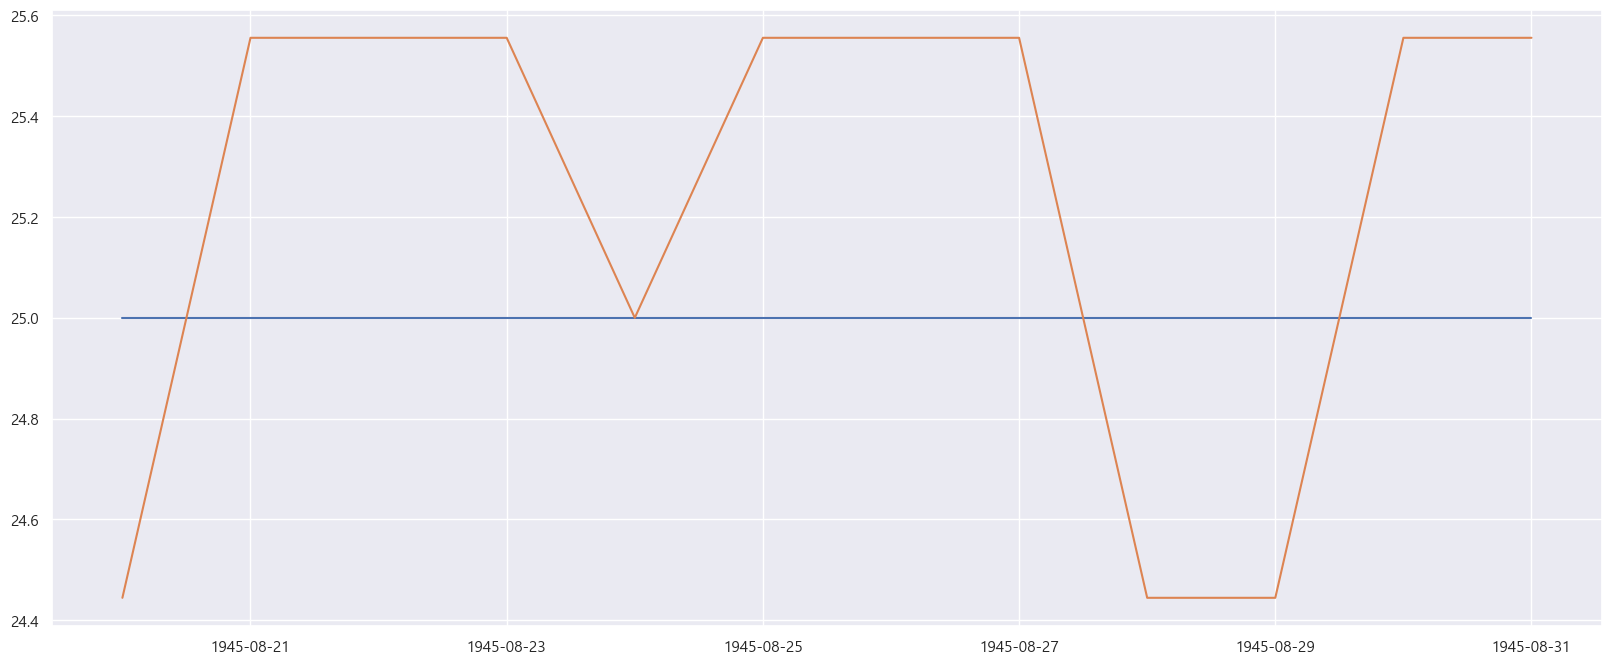

In [29]:
plt.figure(figsize = (20,8))
plt.plot(X_test.index, pred)
plt.plot(X_test.index, X_test)
plt.show()